<a href="https://colab.research.google.com/github/Nikkypatel/Skin-Cancer-Classification/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000"
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikkypatel312
Your Kaggle Key: ··········


100%|██████████| 5.20G/5.20G [00:56<00:00, 98.7MB/s]


In [ ]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path=('skin-cancer-mnist-ham10000/\
hmnist_28_28_RGB.csv')

In [ ]:
df=pd.read_csv(path)

In [ ]:
df = df.sample(frac=1)

In [ ]:
fractions = np.array([0.8, 0.2])
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
# Define the classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}

In [ ]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

In [ ]:
# Oversample the training set to handle class imbalance
oversample = RandomOverSampler()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
# Convert data to NumPy arrays
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1, 28, 28, 3)

In [ ]:
# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Flatten())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(Dense(7, activation='softmax'))

    return model

In [ ]:
# Training parameters
num_epochs = 50
num_training_runs = 2  # Adjust as needed

Training Run 1/2


Epoch 1/50
234/234 [==============================] - ETA: 0s - loss: 1.2036 - accuracy: 0.5618
Epoch 1: val_accuracy improved from -inf to 0.38359, saving model to best_model_run_1.h5
234/234 [==============================] - 62s 252ms/step - loss: 1.2036 - accuracy: 0.5618 - val_loss: 1.7068 - val_accuracy: 0.3836
Epoch 2/50
234/234 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.7566
Epoch 2: val_accuracy did not improve from 0.38359
234/234 [==============================] - 42s 178ms/step - loss: 0.6752 - accuracy: 0.7566 - val_loss: 1.4861 - val_accuracy: 0.3658
Epoch 3/50
234/234 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.38359 to 0.39094, saving model to best_model_run_1.h5
234/234 [==============================] - 45s 192ms/step - loss: 0.4853 - accuracy: 0.8270 - val_loss: 1.3655 - val_accuracy: 0.3909
Epoch 4/50
234/234 [==============================] - ETA: 0s - loss: 0.3623 -

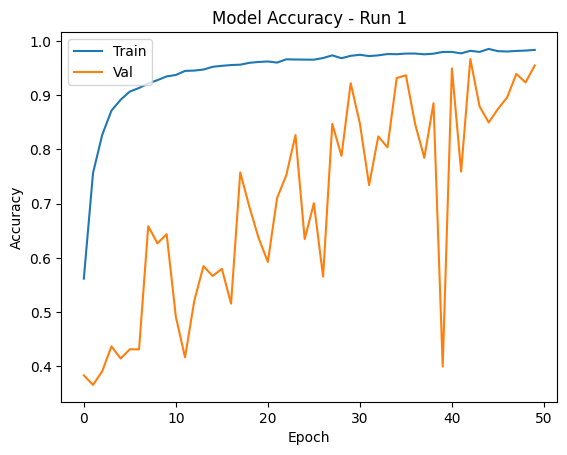

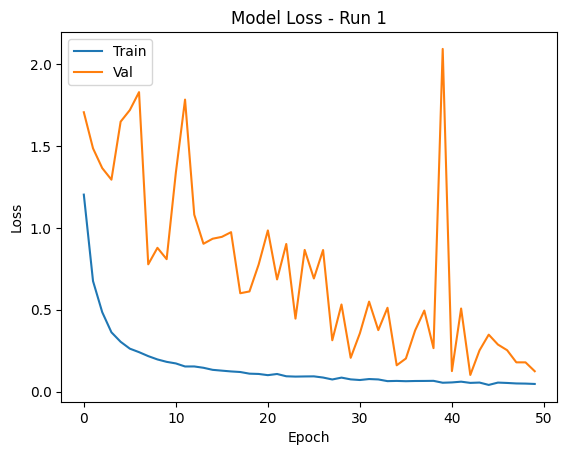

63/63 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

       akiec       0.36      0.26      0.30        62
         bcc       0.76      0.27      0.40       106
         bkl       0.38      0.48      0.42       195
          df       0.86      0.41      0.56        29
          nv       0.88      0.85      0.87      1361
        vasc       0.90      0.56      0.69        32
         mel       0.38      0.56      0.45       218

    accuracy                           0.73      2003
   macro avg       0.65      0.49      0.53      2003
weighted avg       0.76      0.73      0.73      2003

Training Run 2/2


Epoch 1/50
234/234 [==============================] - ETA: 0s - loss: 1.2077 - accuracy: 0.5651
Epoch 1: val_accuracy improved from -inf to 0.21625, saving model to best_model_run_2.h5
234/234 [==============================] - 46s 181ms/step - loss: 1.2077 - accuracy: 0.5651 - val_loss: 1.8732 - val_accuracy: 0.2163
Epoch 2/50
234/234 [==============================] - ETA: 0s - loss: 0.6674 - accuracy: 0.7623
Epoch 2: val_accuracy improved from 0.21625 to 0.41259, saving model to best_model_run_2.h5
234/234 [==============================] - 40s 171ms/step - loss: 0.6674 - accuracy: 0.7623 - val_loss: 1.6058 - val_accuracy: 0.4126
Epoch 3/50
234/234 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.8349
Epoch 3: val_accuracy did not improve from 0.41259
234/234 [==============================] - 41s 174ms/step - loss: 0.4664 - accuracy: 0.8349 - val_loss: 1.5808 - val_accuracy: 0.3786
Epoch 4/50
234/234 [==============================] - ETA: 0s - loss: 0.3711 -

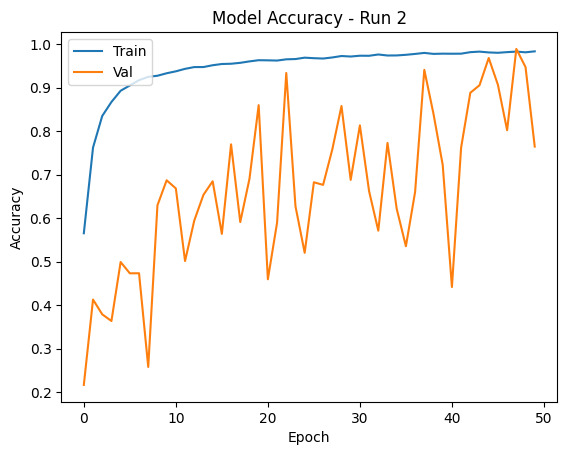

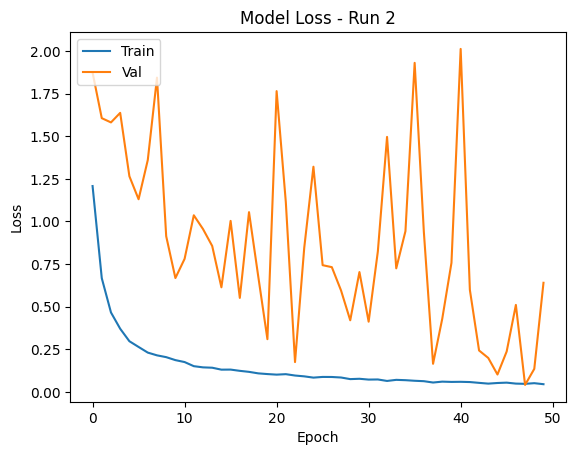

63/63 [==============================] - 2s 22ms/step
              precision    recall  f1-score   support

       akiec       0.29      0.35      0.32        62
         bcc       0.51      0.53      0.52       106
         bkl       0.42      0.43      0.43       195
          df       0.67      0.28      0.39        29
          nv       0.93      0.73      0.82      1361
        vasc       0.94      0.50      0.65        32
         mel       0.31      0.74      0.44       218

    accuracy                           0.67      2003
   macro avg       0.58      0.51      0.51      2003
weighted avg       0.77      0.67      0.70      2003



In [ ]:
# Training loop
for run in range(1, num_training_runs + 1):
    print(f"Training Run {run}/{num_training_runs}")

    # Create a new model for each run
    model = create_model()

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(lr=0.0001)  # Adjust the learning rate
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'best_model_run_{run}.h5',
                                                  monitor='val_accuracy',
                                                  mode='max',
                                                  verbose=1,
                                                  save_best_only=True)

    start_time = datetime.now()
    history = model.fit(x_train,
                        y_train,
                        validation_split=0.2,
                        batch_size=128,
                        epochs=num_epochs,
                        shuffle=True,
                        callbacks=[callback])
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    # Evaluate the model on the test set
    model.load_weights(f'best_model_run_{run}.h5')
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Plot accuracy vs epoch
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy - Run {run}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig(f'accuracy_plot_run_{run}.png')
    plt.show()

    # Plot loss vs epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss - Run {run}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig(f'loss_plot_run_{run}.png')
    plt.show()

    # Save the model for future use
    model.save(f'SkinCancerModel_run_{run}.h5')

    # Generate classification report on the test set
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    print(classification_report(y_test, y_pred, target_names=[classes[i][0] for i in range(7)]))